HR Analytics Project- Understanding the Attrition in HR
Problem Statement:
Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.


### Problem type - Classification

In [33]:
# Import the module for data manipulatipon
import pandas as pd
import numpy as np

# IMport the visualizer
import matplotlib.pyplot as plt
import seaborn as sns

#  Import the module for data analysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import  accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('HR-Employee-Attrition.csv')

In [3]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


**Check the null value**

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No, THere is no null value

**We need only numerical value, Is there any string also?**

In [5]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Yes, there are 9 cloumn have text values

<AxesSubplot:xlabel='Attrition', ylabel='WorkLifeBalance'>

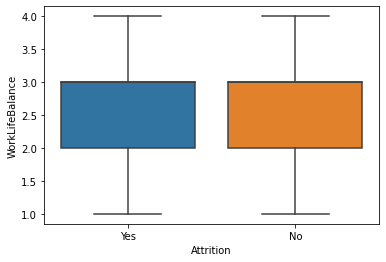

In [6]:
# Relationship visulaization
sns.boxplot(x='Attrition',y='WorkLifeBalance',data=data)

<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

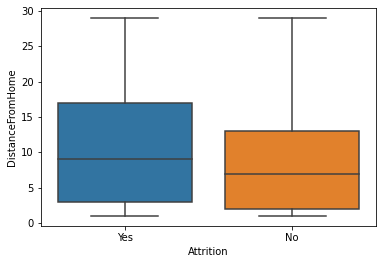

In [7]:
sns.boxplot(x='Attrition',y='DistanceFromHome',data=data)

<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

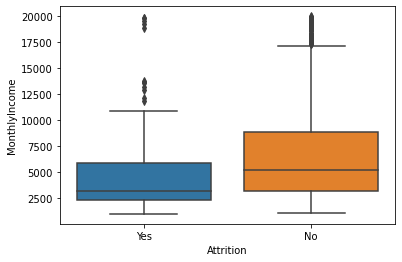

In [8]:
sns.boxplot(x='Attrition',y='MonthlyIncome',data=data)

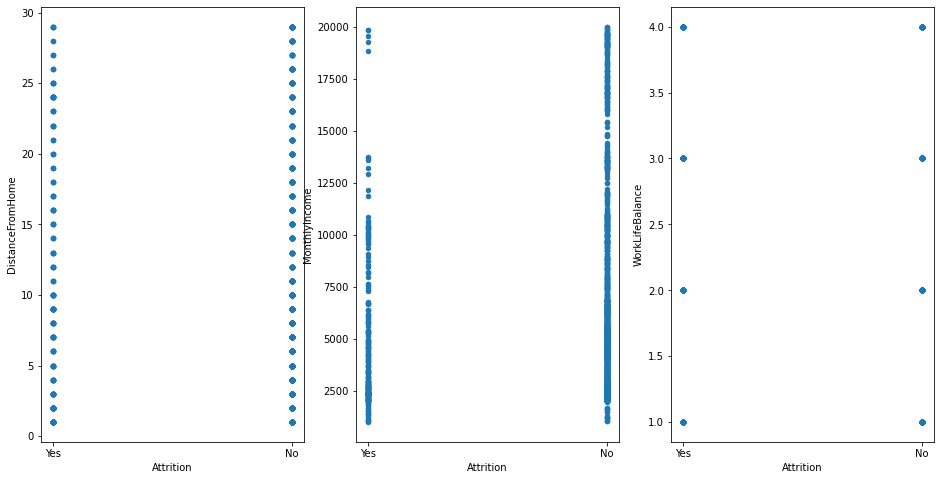

In [9]:
# visualise the relationship between the features and the responses using scatterplots

fig, axs =plt.subplots(1,3)

data.plot(kind='scatter', x='Attrition', y='DistanceFromHome', ax=axs[0],figsize=(16,8))
data.plot(kind='scatter', x='Attrition', y='MonthlyIncome', ax=axs[1])
data.plot(kind='scatter', x='Attrition', y='WorkLifeBalance', ax=axs[2])
fig.savefig('testdata.jpg')

<AxesSubplot:xlabel='Age', ylabel='Density'>

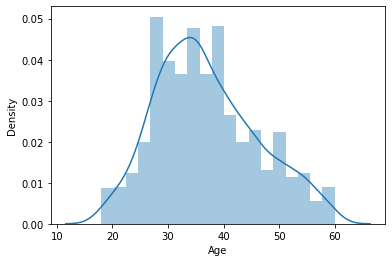

In [10]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='DailyRate', ylabel='Density'>

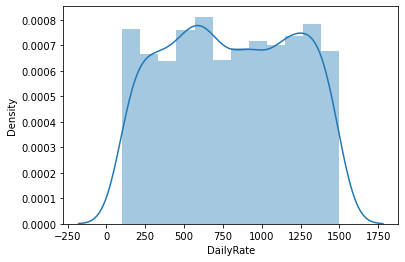

In [11]:
sns.distplot(data['DailyRate'])

<AxesSubplot:xlabel='DistanceFromHome', ylabel='Density'>

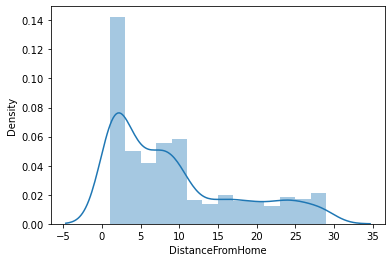

In [12]:
sns.distplot(data['DistanceFromHome'])

<AxesSubplot:xlabel='EnvironmentSatisfaction', ylabel='Density'>

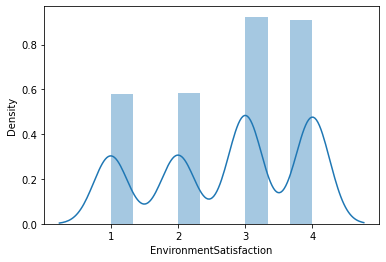

In [13]:
sns.distplot(data['EnvironmentSatisfaction'])

<AxesSubplot:xlabel='JobInvolvement', ylabel='Density'>

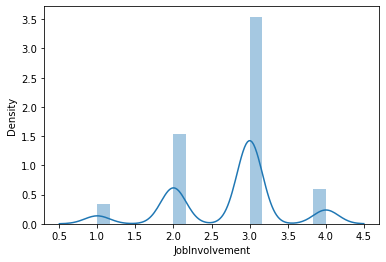

In [14]:
sns.distplot(data['JobInvolvement'])

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

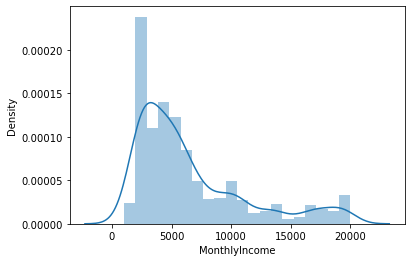

In [15]:
sns.distplot(data['MonthlyIncome'])

In [16]:
data.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EmployeeCount               0.000000
EmployeeNumber              0.016574
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StandardHours               0.000000
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

Some column are largely skewed, example performance rating which is not impacting significantly, so i will not do anything

In [18]:
data.shape

(1470, 35)

It means we have total 35 columns

In [17]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [19]:
# In general observation it can be seen that employee count is just a serial number. IT has not effect of data. Also all the employees age is already been given in the column hence an additional column of over 18 work as duplicasy. Hence I am removing 2 columns
data = data.drop(['EmployeeCount', 'Over18'], axis=1)

In [20]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

Now those 2 columns are removed

In [21]:
# Convert Attrution value yes/no into numerical values
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x=='Yes' else 0)

In [22]:
print(data['Attrition'])

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64


Converted successfuly

As i said earlier we have 9 text columns, i have to do something

In [23]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


We have to correct the Business Travel, Department, Education Field are these are text AND Educaiton, Environment satisfaction, JobInvolvement, Job satisfaction, Performacne Rating, RelationshipSatisfaction, Worklifebalance are categorical data

In [24]:
num_cat=['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction' , 'WorkLifeBalance']
for i in num_cat:
    data[i]=data[i].astype('category')

In [25]:
# This function is used to convert categorical values to Numerical values
data = pd.get_dummies(data)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 74 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   EmployeeNumber                     1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobLevel                           1470 non-null   int64
 7   MonthlyIncome                      1470 non-null   int64
 8   MonthlyRate                        1470 non-null   int64
 9   NumCompaniesWorked                 1470 non-null   int64
 10  PercentSalaryHike                  1470 non-null   int64
 11  StandardHours                      1470 non-null   int64
 12  StockOptionLevel    

In [27]:
data.head()

,Age,Attrition,DailyRate,DistanceFromHome,EmployeeNumber,HourlyRate,JobLevel,MonthlyIncome,MonthlyRate,NumCompaniesWorked,...,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,1,94,2,5993,19479,8,...,1,0,1,0,0,0,1,0,0,0
1,49,0,279,8,2,61,2,5130,24907,1,...,0,1,0,0,0,1,0,0,1,0
2,37,1,1373,2,4,92,1,2090,2396,6,...,1,0,0,1,0,0,0,0,1,0
3,33,0,1392,3,5,56,1,2909,23159,1,...,1,0,0,0,1,0,0,0,1,0
4,27,0,591,2,7,40,1,3468,16632,9,...,1,0,0,0,0,1,0,0,1,0


In [28]:
data.shape

(1470, 74)

**Seperating the feature and target metrics**

In [29]:
x = data.drop(['Attrition'], axis=1)

In [30]:
y = data['Attrition']

**Scale the values to standardize the range of features**

In [31]:
scl = StandardScaler()
x = scl.fit_transform(x)

**Let's split the data**

In [35]:
lr = LogisticRegression()

for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=i, test_size=0.20)
    lr.fit(x_train, y_train)
    pred_train= lr.predict(x_train)
    pred_test = lr.predict(x_test)
    if round(accuracy_score(y_train, pred_train)*100,1)==round(accuracy_score(y_test, pred_test)*100,1):
        print("At random state", i, "the model performs very well")
        print("At random state:-", 1)
        print("Training r2 score is:-", accuracy_score(y_train, pred_train)*100)
        print("Testing r2_score is:-", accuracy_score(y_test, pred_test)*100)

At random state 226 the model performs very well
At random state:- 1
Training r2 score is:- 89.45578231292517
Testing r2_score is:- 89.45578231292517
At random state 318 the model performs very well
At random state:- 1
Training r2 score is:- 89.1156462585034
Testing r2_score is:- 89.1156462585034
At random state 320 the model performs very well
At random state:- 1
Training r2 score is:- 89.54081632653062
Testing r2_score is:- 89.45578231292517
At random state 326 the model performs very well
At random state:- 1
Training r2 score is:- 89.1156462585034
Testing r2_score is:- 89.1156462585034
At random state 342 the model performs very well
At random state:- 1
Training r2 score is:- 89.45578231292517
Testing r2_score is:- 89.45578231292517
At random state 386 the model performs very well
At random state:- 1
Training r2 score is:- 89.45578231292517
Testing r2_score is:- 89.45578231292517
At random state 417 the model performs very well
At random state:- 1
Training r2 score is:- 89.115646258

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=226)

**226 RANDOM state was giving the best score but in classification report it is not showing the best result wtih 226.**

**Lets use other classifier for Checking the Accuracy score**

**KNeighborsClassifier**

In [38]:
from sklearn.neighbors import KNeighborsClassifier  #Import packages related to Model
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [39]:
#Accuracy score
knn.score(x_test,y_test)

0.8469387755102041

In [40]:
y_pred = knn.predict(x_test)

In [41]:
cm = confusion_matrix
cm(y_test, y_pred)

array([[242,   4],
       [ 41,   7]], dtype=int64)

**Decision Tree**

In [42]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
# Accuracy score
dt.score(x_test, y_test)

0.7993197278911565

**Logistic Regression**

In [44]:
lr= LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [45]:
# Accuracy score
lr.score(x_test, y_test)

0.8945578231292517

In [46]:
y_pred= lr.predict(x_test)

In [47]:
cm = confusion_matrix
cm(y_test, y_pred)

array([[242,   4],
       [ 27,  21]], dtype=int64)

Coefficient for all the columns

In [48]:
lr.coef_

array([[-0.26896861, -0.0762184 ,  0.44865027, -0.05809675,  0.07650725,
        -0.23230715, -0.08343507,  0.07994244,  0.52677572,  0.00669404,
         0.        , -0.18256327, -0.40255588, -0.2698758 ,  0.44752694,
        -0.55732247,  0.62790209, -0.46427904, -0.2432794 ,  0.2547314 ,
        -0.05721362, -0.18561471, -0.01014926,  0.09227703, -0.03737179,
        -0.00318239,  0.08916431, -0.04076362, -0.06838756,  0.05621952,
        -0.11131698,  0.16909638, -0.14787753, -0.05564077,  0.26662645,
         0.34587808, -0.0034767 , -0.11794987, -0.17557212, -0.0858013 ,
         0.0858013 ,  0.28016821,  0.03962839, -0.0264318 , -0.23193017,
        -0.1841469 ,  0.33601039,  0.29827508, -0.03811579, -0.0401531 ,
        -0.40631912, -0.11160615, -0.01660946,  0.18204511,  0.30448131,
        -0.01562668,  0.03590822, -0.28341798, -0.21875419, -0.06316951,
         0.2625594 , -0.42958937,  0.42958937,  0.00526   , -0.00526   ,
         0.25135363, -0.11072878, -0.00271744, -0.1

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       246
           1       0.84      0.44      0.58        48

    accuracy                           0.89       294
   macro avg       0.87      0.71      0.76       294
weighted avg       0.89      0.89      0.88       294



#### Moving Saving

In [50]:
import pickle
filename = 'Attrition.pkl'
pickle.dump(lr, open(filename, 'wb'))

### As shown in the classificatioin report i have accuracy of 89%. It can be said to be a good model